## Introduction

Powerlifting is a strength sport that consists of three attempts at maximal weight on three lifts: squat, bench press, and deadlift. As in the sport of Olympic weightlifting, it involves the athlete attempting a maximal weight single lift of a barbell loaded with weight plates. Powerlifting evolved from a sport known as "odd lifts", which followed the same three-attempt format but used a wider variety of events, akin to strongman competition. Eventually odd lifts became standardized to the current three.

In competition, lifts may be performed equipped or un-equipped (typically referred to as 'raw' lifting or 'classic' in the IPF specifically). Equipment in this context refers to a supportive bench shirt or squat/deadlift suit or briefs. In some federations, knee wraps are permitted in the equipped but not un-equipped division; in others, they may be used in both equipped and un-equipped lifting. Weight belts, knee sleeves, wrist wraps and special footwear may also be used, but are not considered when distinguishing equipped from un-equipped lifting.

Competitions take place across the world. Powerlifting has been a Paralympic sport (bench press only) since 1984 and, under the IPF, is also a World Games sport. Local, national and international competitions have also been sanctioned by other federations operating independently of the IPF.

### Inspiration

I'd like to answer the following questions.
* How has the sport progressed over the years?
* How much of a difference does being subjected to drug testing make?
* How much does age and gender effect weight lifted?

Source: [Wikipedia](https://en.wikipedia.org/wiki/Powerlifting)

Acknowledgement: [OpenPowerlifting](https://www.openpowerlifting.org/) for providing a snapshot of their database.

## 1. Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk

pd.set_option('display.max_columns', 500)

## 2. Reading/Preparing the Data

We want your data to fit the following criteria
* Age was included
* Weight was included
* Whether or not was tested is included
* Didn't bomb
* Wilks was included
* Competed raw
* Competed in full power meet (SBD)

In [3]:
pl = pd.read_csv("openpowerlifting.csv")
print(pl.shape)
pl.head(n=5)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(911485, 36)


,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Tested,AgeClass,Country,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName
0,Angie Belk Terry,F,SBD,Wraps,47.0,Mst 45-49,59.60,60,38.56,47.63,-54.43,NaN,47.63,15.88,20.41,-24.95,NaN,20.41,61.23,70.31,-77.11,NaN,70.31,138.35,1,155.05,167.76,No,45-49,NaN,137.00,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
1,Dawn Bogart,F,SBD,Single-ply,42.0,Mst 40-44,58.51,60,120.20,136.08,142.88,NaN,142.88,88.45,95.25,-97.52,NaN,95.25,136.08,149.69,163.29,NaN,163.29,401.42,1,456.38,465.50,No,40-44,NaN,403.37,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
2,Dawn Bogart,F,SBD,Single-ply,42.0,Open Senior,58.51,60,120.20,136.08,142.88,NaN,142.88,88.45,95.25,-97.52,NaN,95.25,136.08,149.69,163.29,NaN,163.29,401.42,1,456.38,465.50,No,40-44,NaN,403.37,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
3,Dawn Bogart,F,B,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,NaN,NaN,88.45,95.25,-97.52,NaN,95.25,NaN,NaN,NaN,NaN,NaN,95.25,1,108.29,110.46,No,40-44,NaN,95.71,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
4,Destiny Dula,F,BD,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,NaN,NaN,29.48,31.75,-34.02,NaN,31.75,90.72,-97.52,NaN,NaN,90.72,122.47,1,130.47,138.29,No,18-19,NaN,115.19,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...


We can see that we have quite a few irrelevant columns for the purpose of our analysis, so let's clean it up a bit. Additionally, let's filter only 'SBD' events.

In [4]:
pl = pl.drop(['MeetName', 'Country', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Bench1Kg', 'Bench2Kg',
              'Bench3Kg', 'Bench4Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'AgeClass', 
              'McCulloch', 'Glossbrenner', 'Division'], axis=1)
pl = pl[pl['Event'] == 'SBD']
pl = pl[pl['Equipment'] == 'Raw']
pl.head(n=5)

,Name,Sex,Event,Equipment,Age,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Wilks,Tested,Federation,Date,MeetCountry,MeetState
6,Maureen Clary,F,SBD,Raw,60.0,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98,No,365Strong,2016-10-29,USA,NC
7,Maureen Clary,F,SBD,Raw,60.0,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98,No,365Strong,2016-10-29,USA,NC
14,Danielle Ortiz,F,SBD,Raw,17.0,69.31,75,81.65,49.90,115.67,247.22,1,247.64,No,365Strong,2016-10-29,USA,NC
17,Emma Love,F,SBD,Raw,18.0,77.93,82.5,86.18,52.16,83.91,222.25,1,206.43,No,365Strong,2016-10-29,USA,NC
18,Kelly Benson,F,SBD,Raw,22.0,88.72,90,102.06,77.11,120.20,299.37,1,260.25,No,365Strong,2016-10-29,USA,NC


We'll take care of NaN values in the most important columns and mutate the date column to include just the year.

In [5]:
pl = pl.dropna(subset = ['BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg','TotalKg', 'Wilks', 
                         'Tested', 'Age'])
pl['Year'] = pd.DatetimeIndex(pl['Date']).year  
pl = pl.drop(['Date'], axis=1)
print(pl.shape)
pl.head(n=5)


(176436, 18)


,Name,Sex,Event,Equipment,Age,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Wilks,Tested,Federation,MeetCountry,MeetState,Year
6,Maureen Clary,F,SBD,Raw,60.0,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98,No,365Strong,USA,NC,2016
7,Maureen Clary,F,SBD,Raw,60.0,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98,No,365Strong,USA,NC,2016
14,Danielle Ortiz,F,SBD,Raw,17.0,69.31,75,81.65,49.90,115.67,247.22,1,247.64,No,365Strong,USA,NC,2016
17,Emma Love,F,SBD,Raw,18.0,77.93,82.5,86.18,52.16,83.91,222.25,1,206.43,No,365Strong,USA,NC,2016
18,Kelly Benson,F,SBD,Raw,22.0,88.72,90,102.06,77.11,120.20,299.37,1,260.25,No,365Strong,USA,NC,2016


## 3. Growth by Gender Analysis

The sport is dominated by males so let's see what proportion are females and males.

In [6]:
print('Percentage of Male lifters: ', round(len(pl[pl['Sex']=='M'])/len(pl)*100),'%')
print('Percentage of Female lifters: ', round(len(pl[pl['Sex']=='F'])/len(pl)*100),'%')

Percentage of Male lifters:  66 %
Percentage of Female lifters:  34 %


Let's take a look at the growth of the sport grouped by gender.

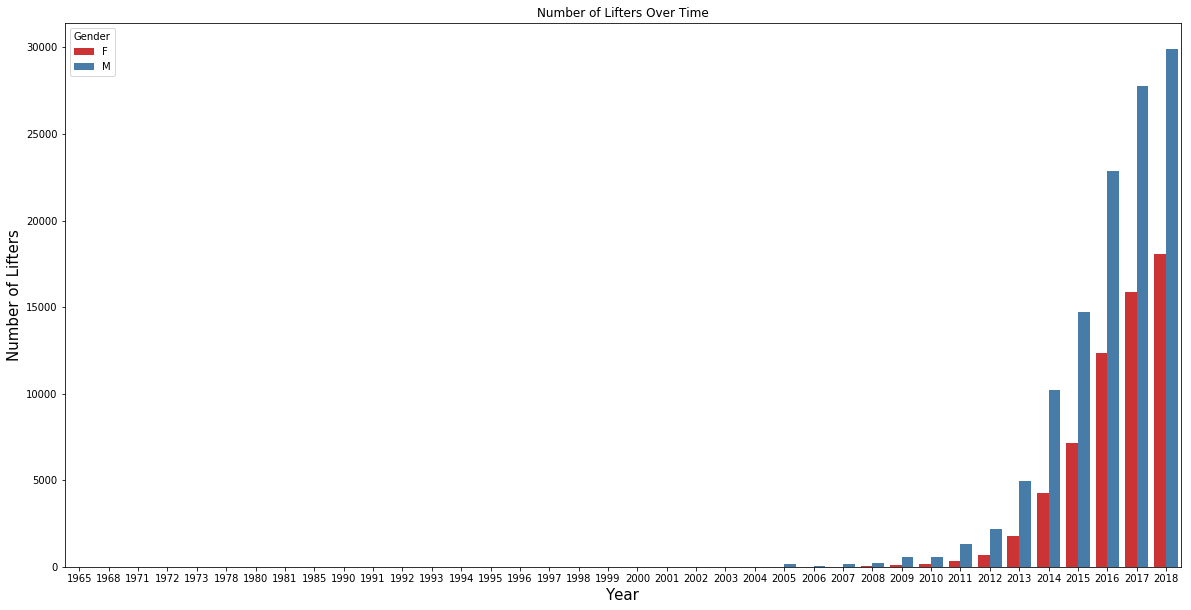

In [78]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=pl, hue='Sex', palette='Set1')
plt.title('Number of Lifters Over Time')
plt.ylabel('Number of Lifters', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend(loc='upper left', title='Gender')
plt.show()

There's an obvious spike in popularity around 2012 which continues till the current year. This was around when YouTube channels such as Omarisuf, Barbell Brigade, SuperTraining Gym, etc really picked up.

## 4. Test vs. Non-tested

First let's see the distribution of tested and non-tested lifters, we will also group by gender as this is most likely another strong confounding variable. In this context tested means the lifter is subject to drug testing but this does not necessarily mean the lifter is tested.

Wilks is a point system based on the total weight lifted and the lifter's bodyweight (higher is better).

In [8]:
print(pl['Tested'].value_counts())

Yes    127923
No      48513
Name: Tested, dtype: int64


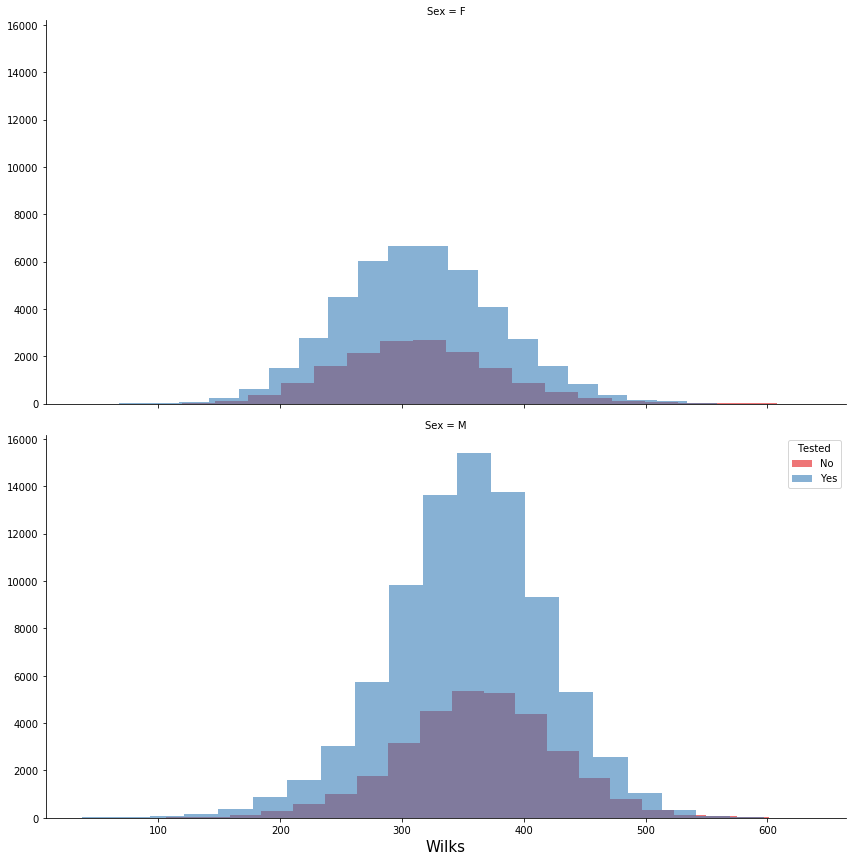

MEAN 
 Tested  Sex
No      F      313.820438
        M      362.684352
Yes     F      314.340158
        M      354.303991
Name: Wilks, dtype: float64


MEDIAN 
 Tested  Sex
No      F      311.590
        M      363.910
Yes     F      312.815
        M      356.630
Name: Wilks, dtype: float64


MAX 
 Tested  Sex
No      F      634.84
        M      601.50
Yes     F      558.86
        M      597.23
Name: Wilks, dtype: float64


In [90]:
g = sns.FacetGrid(data=pl, hue='Tested', row='Sex', height=6, aspect=2, legend_out=True, palette="Set1")
g = g.map(plt.hist, 'Wilks', bins=20, alpha=0.6)
plt.xlabel('Wilks',fontsize=15)
plt.legend(loc=1, title="Tested")
plt.show()

print("MEAN \n", pl.groupby(by=['Tested','Sex'])['Wilks'].mean())
print("\n\nMEDIAN \n", pl.groupby(by=['Tested','Sex'])['Wilks'].median())
print("\n\nMAX \n", pl.groupby(by=['Tested','Sex'])['Wilks'].max())

Here we can see that other from amount of people in each group the two distributions are relatively the same. The mean, median and max are slightly higher for the non-tested group which may be explained by drug use. However, my suspicion is that even though a lifter competes in a non-tested federation they are most likely not using performance enhancing drugs or are simply too novice to for it to make a significant difference. Where a more significant difference may lie is in the elite lifters nearing human capabilities. Performance enhancing drugs should raise a lifters potential, so let's compare only elite level lifters while still grouping by gender. Lets take the 99th percentile of lifters.

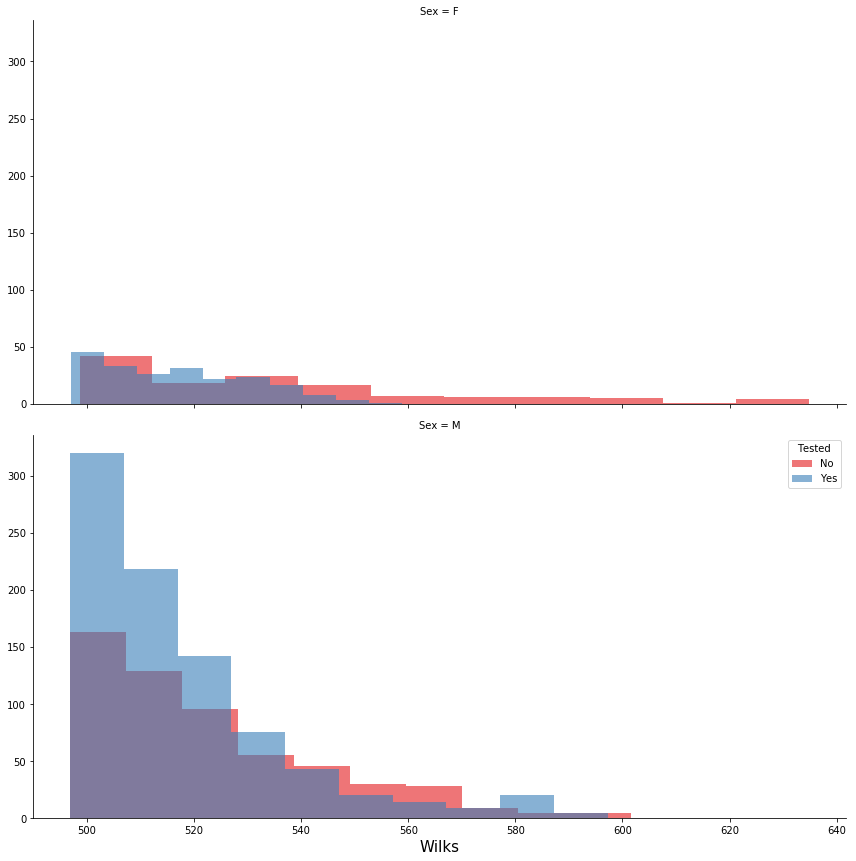

MEDIAN 
 Sex  Tested
F    No        528.440
     Yes       515.545
M    No        517.035
     Yes       511.850
Name: Wilks, dtype: float64


MEAN 
 Sex  Tested
F    No        535.549070
     Yes       516.816731
M    No        522.439964
     Yes       517.116809
Name: Wilks, dtype: float64


MAX 
 Sex  Tested
F    No        634.84
     Yes       558.86
M    No        601.50
     Yes       597.23
Name: Wilks, dtype: float64


In [105]:
top = pl.sort_values('Wilks', ascending=False)[0:round(len(pl)*0.01)]
n = sns.FacetGrid(data=top, hue='Tested', row='Sex', height=6, aspect=2, legend_out=True, palette="Set1")
n = n.map(plt.hist, 'Wilks', bins=10, alpha=0.6)
plt.xlabel('Wilks',fontsize=15)
plt.legend(loc=1, title="Tested")
plt.show()

print("MEDIAN \n",top.groupby(by=['Sex','Tested'])['Wilks'].median())
print("\n\nMEAN \n",top.groupby(by=['Sex','Tested'])['Wilks'].mean())
print("\n\nMAX \n",top.groupby(by=['Sex','Tested'])['Wilks'].max())

We can see some more interesting results here. There's a large gap between female tested and untested lifters with the top untested lifter 76 points ahead of the top tested lifter. Whereas in males there is much less of a gap where the top lifters in each group are nearly identical.

## How Age & Gender Effect Weight Lifted